# Local Reality vs Bell's Inequality

_"God does not play dice with the universe"_, said Albert Einstein, to assert his disagreement in the opinion that the fundamental nature of reality could be probabilistic. In 1935, along with Rosen and Podolsky, he hypothesized that particles are preordained with their corresponding measurements at their inception, and hence, measuring the state of one particle does not cause the other particle to take up another state - these states are intrinsic to these particles. Einstein speaks of a _local universe_, where these particles can be seperated by distances so large, that interaction between them is not possible. This theory was aptly named the "_hidden variables_" theory, and many such hidden variable theories were conceptualised. However, these theories failed to explain randomness in single particles and relative measurements on different particles in a multi-particle system.

John Bell, in his 1963 publication, argued that the destiny of particles is not decided at birth, and all theories hypothesizing this could be experimentally disproven.

It is our effort, with tremendous help from [this Qiskit demo by IBM Quantum Labs](https://qiskit.org/textbook/ch-demos/chsh.html), to experimentally demonstrate the success of Bell's claim, and that the universe does follow the laws laid down by Quantum Mechanics.

### Setting Up - The Locally Real Universe

Our experiment is conducted by two friendly chaps named Alice and Bob, and their supervisor Viraj. Viraj hands Alice and Bob one qubit each - one half of a bipartite entangled system. Alice makes two measurements on her qubit - on bases A<sub>1</sub> and A<sub>2</sub>. Similarly, Bob makes his respective measurements on bases B<sub>1</sub> and B<sub>2</sub>.

We define a quantity $\langle S \rangle$ as:

$\langle S \rangle = \langle A_1B_1 \rangle - \langle A_1B_2 \rangle + \langle A_2B_1 \rangle + \langle A_2B_2 \rangle $

We now proceed to calculate the expected value of $\langle S \rangle$.

Since Alice and Bob are given a qubit each, any measurement performed on their system will only amount to +1 or -1. Although qubit states are typically referred to as $|0\rangle$ and $|1\rangle$, these are *eigenstates*, and a projective measurement will yield their *eigenvalues*, +1 and -1, respectively.

Therefore, $A_1,A_2,B_1,B_2=\pm1$,

which further implies that $(B_1-B_2)$ and $(B_1+B_2)$ can either be $0$ or $\pm2$.

Hence, $A_1(B_1-B_2) + A_2(B_1+B_2)$ can only be either +2 or -2.

Hence, $|\langle S \rangle| = |\langle A_1B_1 \rangle - \langle A_1B_2 \rangle + \langle A_2B_1 \rangle + \langle A_2B_2 \rangle| \leq 2 $, i.e. the expected value of $|\langle S \rangle|$ is bound by $2$ in a *locally real universe*, as proposed by EPR.



### Experimenting with entangled particles 

The previous cell laid out what would be true were we living in a locally real world. Now, let us conduct the same experiment on two entangled particles to verify if the world we live in is truly local.

_Imports_

In [2]:
#for qiskit
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#for python
import matplotlib.pyplot as plt
import numpy as np
import time

_Setting Up IBM Q Device and Simulator to run the experiment_

In [4]:
#Setting up IBM Quantum Device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

#Setting up simulator
sim = Aer.get_backend('aer_simulator')

ibmqfactory.load_account:WARNING:2022-12-19 14:04:59,736: Credentials are already in use. The existing account in the session will be replaced.


Running quantum experiments asks of us to create quantum circuits using qubits. We now definde a function to create these circuits for our experiment. 

For their respective measurements, Bob chooses to always use the $Z$ and $X$ bases in lieu of $B_1$ and $B_2$, whereas Alice chooses a set of orthogonal bases with an angle varying between $0$ and $2\pi$ with respect to Bob's bases $Z$ and $X$. This set of angles, $\theta$,  will be the argument for our circuit building function.

In [14]:
def create_circuits(thetas):
    
    """
    Args: 
        thetas (list): list of angles between the bases of Alice and Bob
    Returns:
        List[QuantumCircuit]: A list of objects of class QuantumCircuit for each angle in thetas
    
    ********************

    Gates used:
    
    The Hadamard Gate: The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away 
    from the poles of the Bloch sphere and create a superposition of |0⟩ and  |1⟩. This can be thought of as a rotation around the Bloch vector [1,0,1] 
    (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.
    Used as qc.h()
    
    Source: https://qiskit.org/textbook/ch-states/single-qubit-gates.html#3.-The-Hadamard-Gate--
    
    The CNOT Gate: This gate is a conditional gate that performs an X-gate on the second qubit (target), 
    if the state of the first qubit (control) is  |1⟩. Used as qc.cx()
    
    Source: https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#3.1-The-CNOT-Gate-
    
    The RY Gate: Single qubit rotation about the y-axis.
    Used as qc.ry()
    Source: https://qiskit.org/documentation/stubs/qiskit.circuit.library.RYGate.html#rygate
 
    """
    
    circuits = []
    
    for theta in thetas:
        observations = ['00', '01','10','11']
        for observation in observations:
            qc = QuantumCircuit(2,2)
            qc.h(0) #hadamard gate on the 0th qubit
            qc.cx(0, 1) #controlled-x gate on the 0th and the 1st qubits
            qc.ry(theta, 0) #rotation about the y-axis
            for i in range(2):
                if observation[i] == '1':
                    qc.h(i)
            qc.measure(range(2), range(2))
            circuits.append(qc)
        
    return circuits

Now that we have a function to create qantum circuits, we split the interval $[0,2\pi)$ into $n$ angles, say $25$, and build the corresponding set of circuits.

In [16]:
n_angles = 25
thetas = np.linspace(0, 2*np.pi, n_angles)
my_circuits = create_circuits(thetas)
print(len(my_circuits))

100


To understand what is going on, we can have a look at a few circuits created by the function <code>create_circuits()</code> for a given angle $\theta$

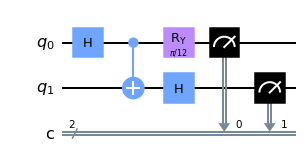

In [17]:
my_circuits[5].draw()

These circuits create a *Bell Pair*, and then measure what Alice and Bob would measure in a different basis. As noted previously, Bob always measures his qubit (*q1*) either in the $Z$ or the $X$ basis, whereas Alice's basis of measurement rotates by the angle $\theta$ with respect to Bob's.

We now have a list of QuantumCircuits for various angles, $\theta$, for our experiment, along with what Bob and Alice would measure on their respective bases. This implies that we now have all the sufficient information required to compute $\langle S \rangle$.

$\langle S \rangle = \langle A_1B_1 \rangle - \langle A_1B_2 \rangle + \langle A_2B_1 \rangle + \langle A_2B_2 \rangle$ 

Once the corresponding measurement bases have been chosen for Alice and Bob (i.e. for each QuantumCircuit), all the required expectation values can be calculated by adding the counts from the output bitstrings with the appropriate signs ($+$ for $00$ and $11$, and $-$ for $01$ and $10$)


We now write a function to compute $\langle S \rangle$

In [24]:
def compute_s(counts):
    
    """
    This function computes expectation values for ⟨𝑆⟩ for each 𝜃 between
    mesurement bases for Alice and Bob
    
        Args: 
            counts (list[dict]): dictionary of counts for each experiment
            (4 counts per 𝜃 )
        
        Returns:
            List: List of estimated values of ⟨𝑆⟩.
    
    """
    #Order is ZZ, ZX, XZ, XX
    
    S = []
    
    #Divide the list of dictionaries in sets of 4
    for i in range(0, len(counts), 4):
        theta_dict = counts[i:i + 4]
        #print("Theta_dict = ", theta_dict)
        zz = theta_dict[0]
        zx = theta_dict[1]
        xz = theta_dict[2]
        xx = theta_dict[3]
        
        shots = sum(xx[y] for y in xx)
        #print("Shots = ", shots)
        
        s = 0
        
        for element in zz:
            parity = (-1)**(int(element[0])+int(element[1]))
            s+=parity*zz[element]
            
        for element in zx:
            parity = (-1)**(int(element[0])+int(element[1]))
            s+=parity*zx[element]
        
        
        for element in xz:
            parity = (-1)**(int(element[0])+int(element[1]))
            s-= parity*xz[element]
            

        for element in xx:
            parity = (-1)**(int(element[0])+int(element[1]))
            s+= parity*xx[element]
            
        S.append(s/shots)
        
    return S
            
            

The function <code>compute_s</code> gives us a list of expected values of $\langle S \rangle$ for all measurements taken by Alice and Bob for their corresponding bases. Now, it is time to run this function on a quantum simulator, which would give us results that an idea quantum computer would, and on a real quantum machine, the results of which would be prone to some noise, but will give us a more realistic picture of what values $\langle S \rangle$ takes.

In [29]:
#Quantum Simulator - Ideal Values
result_ideal = sim.run(my_circuits).result()

#Real Quantum Computer
tic = time.time()
transpiled_circuits = transpile(my_circuits, quito)
"""
Transpilation is necessary to optimize the circuit 
for execution on present day noisy quantum systems.
"""
job_real = quito.run(transpiled_circuits, shots = 8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
237.38212537765503


This is the home stretch! Now, to visualise our results, we plot them.

In [28]:
S_ideal = compute_s(result_ideal.get_counts())
S_real = compute_s(result_real.get_counts())

Text(0, 0.5, '⟨S⟩')

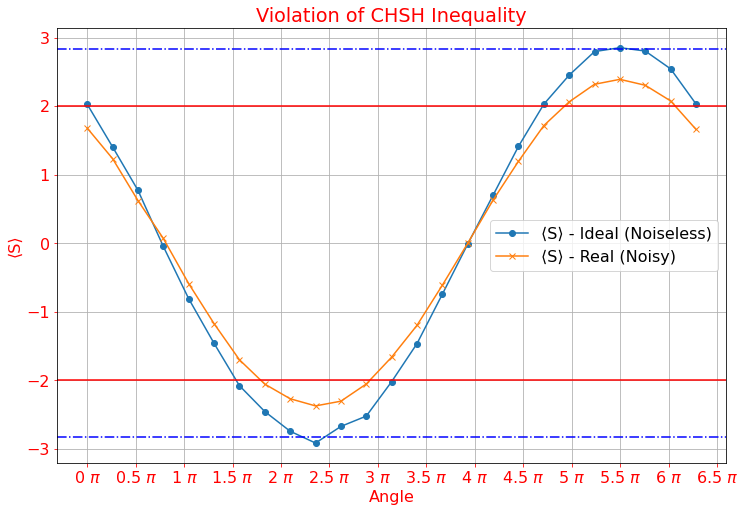

In [85]:
import matplotlib.ticker as tck


fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
ax.plot(thetas,S_ideal,'o-',label = '⟨S⟩ - Ideal (Noiseless)')

ax.plot(thetas,S_real,'x-',label = '⟨S⟩ - Real (Noisy)')

ax.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.legend()

# classical bound +2
ax.axhline(y=2, color='r', linestyle='-')
ax.axhline(y=-2, color='r', linestyle='-')

# quantum bound, +2√2
ax.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
ax.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
         

ax.tick_params(axis='x', colors='red')    
ax.tick_params(axis='y', colors='red')

# set title, labels, and legend
plt.title('Violation of CHSH Inequality', color='red')
plt.xlabel('Angle', color='red')
plt.ylabel('⟨S⟩', color='red')

*Sheesh!*

From the plot, we can clearly see that a few combinations of measurement bases for Alice and Bob result in $|\langle S \rangle| \geq 2$. This directly contradicts our assumption that the universe in which the experiment was conducted is locally real.

Let us examine this result further.

Upon inspection of our entangled qubits, it can be shown that if $|\Psi\rangle = \frac{1}{\sqrt2}(|00\rangle+|11\rangle)$, then, $\langle A_1B_1 \rangle=-cos\theta_{A_1B_1}$, where $\theta_{A_1B_1}$ is the angle between measurement bases $A_1$ and $B_1$. 

Therefore, for the case when $A_1=\frac{1}{\sqrt2}(\sigma_z-\sigma_x)$ and $A_2=\frac{1}{\sqrt2}(\sigma_z+\sigma_x)$ (Alice's bases) and $B_1=\sigma_z$ and $B_2=\sigma_x$, $\langle S \rangle$ comes out to be $2\sqrt2$, which is *greater* than $2$. 

We can also conclude that $2\sqrt2$ is the maximum value attainable by $\langle S \rangle$ in a universe where the laws of Quantum Mechanics hold.



### So, what's the deal with $\langle S \rangle$?

$|\langle S \rangle| = |\langle A_1B_1 \rangle - \langle A_1B_2 \rangle + \langle A_2B_1 \rangle + \langle A_2B_2 \rangle |\leq 2 $ is a very famous inequality derived in 1969, named CHSH after Clauser, Horne, Shimony and Holt, the violation of which is a direct proof of *Bell's Theorem*. Experimental evidence of this inequality being violated is seen confirmation that that nature can not be described any hidden variable theory. [(*Wikipedia*)](https://en.wikipedia.org/wiki/CHSH_inequality). Hence, we come to conclude that Einstein was mistaken when he said that *God doesn't play dice with the universe.*

*Not only does God play dice with the universe, but he sometimes also throws them where they cannot be seen.*

### References

Córcoles, A. (n.d.), Local Reality and the CHSH Inequality. In A. Abbas, et al. Learn Quantum Computation Using Qiskit. URL: https://qiskit.org/textbook/ch-demos/chsh.html (accessed 12/20/2022) (2020).

